In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
import requests
import time
#Player Data:
#https://appac.github.io/mlb-data-api-docs/#player-data-player-search-get
#Homerun Data:
#https://www.statcrunch.com/5.0/shareddata.php?keywords=BASEBALL

In [4]:
#uses the APPAC API to retrieve Player information
def get_hit_hand(last_name):
    time.sleep(0.1)
    bat_hand = ''
    name = last_name
    url = f"http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&active_sw='Y'\
&name_part='{name}%25'"
    try:
        r = requests.get(url)
        json_data = r.json()
        bat_hand = json_data['search_player_all']['queryResults']['row'].get('bats')
    except:
        pass
    return bat_hand

In [6]:
#import the homerun data
df = pd.read_csv('home_runs.csv', parse_dates=['Date'])

In [7]:
df.head()

,Date,Hitter,Hitter Team,Pitcher,Pitching Team,Inninng,Ballpark,Type,Distance,Speed Off Bat,Elev Angle,Hor Angle,Apex,Number of Parks
0,2016-04-03,"Tulowitzki, Troy",TOR,"Webb, Ryan",TB,8,Tropicana Fi...,PL,400,105.2,25.5,108.3,76,30
1,2016-04-03,"Dickerson, Corey",TB,"Stroman, Marcus",TOR,9,Tropicana Fi...,PL,385,104.8,24.3,69.1,66,28
2,2016-04-04,"Story, Trevor",COL,"Greinke, Zack",ARI,4,Chase Field,ND,428,107.1,29.7,107.1,107,30
3,2016-04-04,"Posey, Buster",SF,"Pena, Ariel",MIL,8,Miller Park,PL,424,105.9,23.4,93.4,79,26
4,2016-04-04,"Seager, Kyle",SEA,"Hamels, Cole",TEX,2,Globe Life P...,PL,422,103.6,30.3,83.3,114,28


In [8]:
#create a 'last name' column to use for look-up
df['last_name'] = df.Hitter.apply(lambda x: x.split(',')[0].lower())

In [10]:
#'look up a player's batting side
df['bat'] = df.last_name.apply(lambda x: get_hit_hand(x))

In [11]:
df_l = df[df.bat == "L"]
df_r = df[df.bat == "R"]

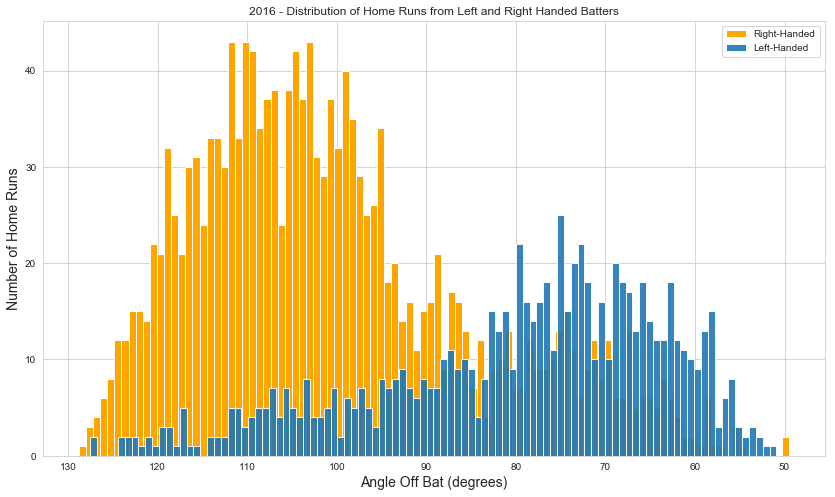

In [13]:
fig, ax = plt.subplots(figsize = (14,8))
df_r['Hor Angle'].hist(bins=100, color='orange')
df_l['Hor Angle'].hist(bins=100, alpha=0.9)
plt.xlabel('Angle Off Bat (degrees)', fontsize=14)
plt.ylabel('Number of Home Runs', fontsize=14)
plt.title('2016 - Distribution of Home Runs from Left and Right Handed Batters')
plt.legend(['Right-Handed','Left-Handed'])
plt.gca().invert_xaxis()